In [1]:
from autogen import ConversableAgent

import os
from dotenv import load_dotenv
load_dotenv()

config_list = [
        # Azure OpenAI deployments
        {
            "model": os.getenv("GPT4o_DEPLOYMENT_NAME"), 
            "tags": ["gpt-4o", "azure", "OpenAI", "big"], # autogen tags for filtering if multiple models are specified
            "api_key": os.getenv("AZURE_API_KEY"), 
            "base_url": os.getenv("AZURE_DEPLOYMENT_ENDPOINT"), 
            "api_type": "azure", 
            "api_version": "2023-03-15-preview", # API VERSION != MODEL VERSION!!!!! Get from deployment targt in Azure AI Studio
            "temperature": 0.2,
        },        
        {
            "model": os.getenv("GPT4omini_DEPLOYMENT_NAME"), 
            "tags": ["gpt-4o-mini", "azure", "OpenAI", "medium"], # autogen tags for filtering if multiple models are specified
            "api_key": os.getenv("AZURE_API_KEY"), 
            "base_url": os.getenv("AZURE_DEPLOYMENT_ENDPOINT"), 
            "api_type": "azure", 
            "api_version": "2023-03-15-preview", # API VERSION != MODEL VERSION!!!!! Get from deployment targt in Azure AI Studio
            "temperature": 0.2,
        },]


**model selection**

In [5]:
# model selection
model = "gpt-4o"
filter_dict = {"tags": [model]}
filtered_cl = [config for config in config_list if model in config.get("tags", [])]


**text reply**

In [2]:

# create agent
system_prompt = "You are a helpful agent" 
agent = ConversableAgent(
        "chatbot",
        system_message=system_prompt,
        llm_config=filtered_cl[0],
        human_input_mode="NEVER",)

message = [{"role": "user", "content": "Hello, how are you?"}]
reply = agent.generate_reply(message)
reply

"Hello! I'm here and ready to help. How can I assist you today?"

**image reply**

* https://github.com/microsoft/autogen/issues/2827
* https://github.com/microsoft/autogen/blob/main/notebook/agentchat_lmm_gpt-4v.ipynb
* if not working could still be implemented as function call and function helpers

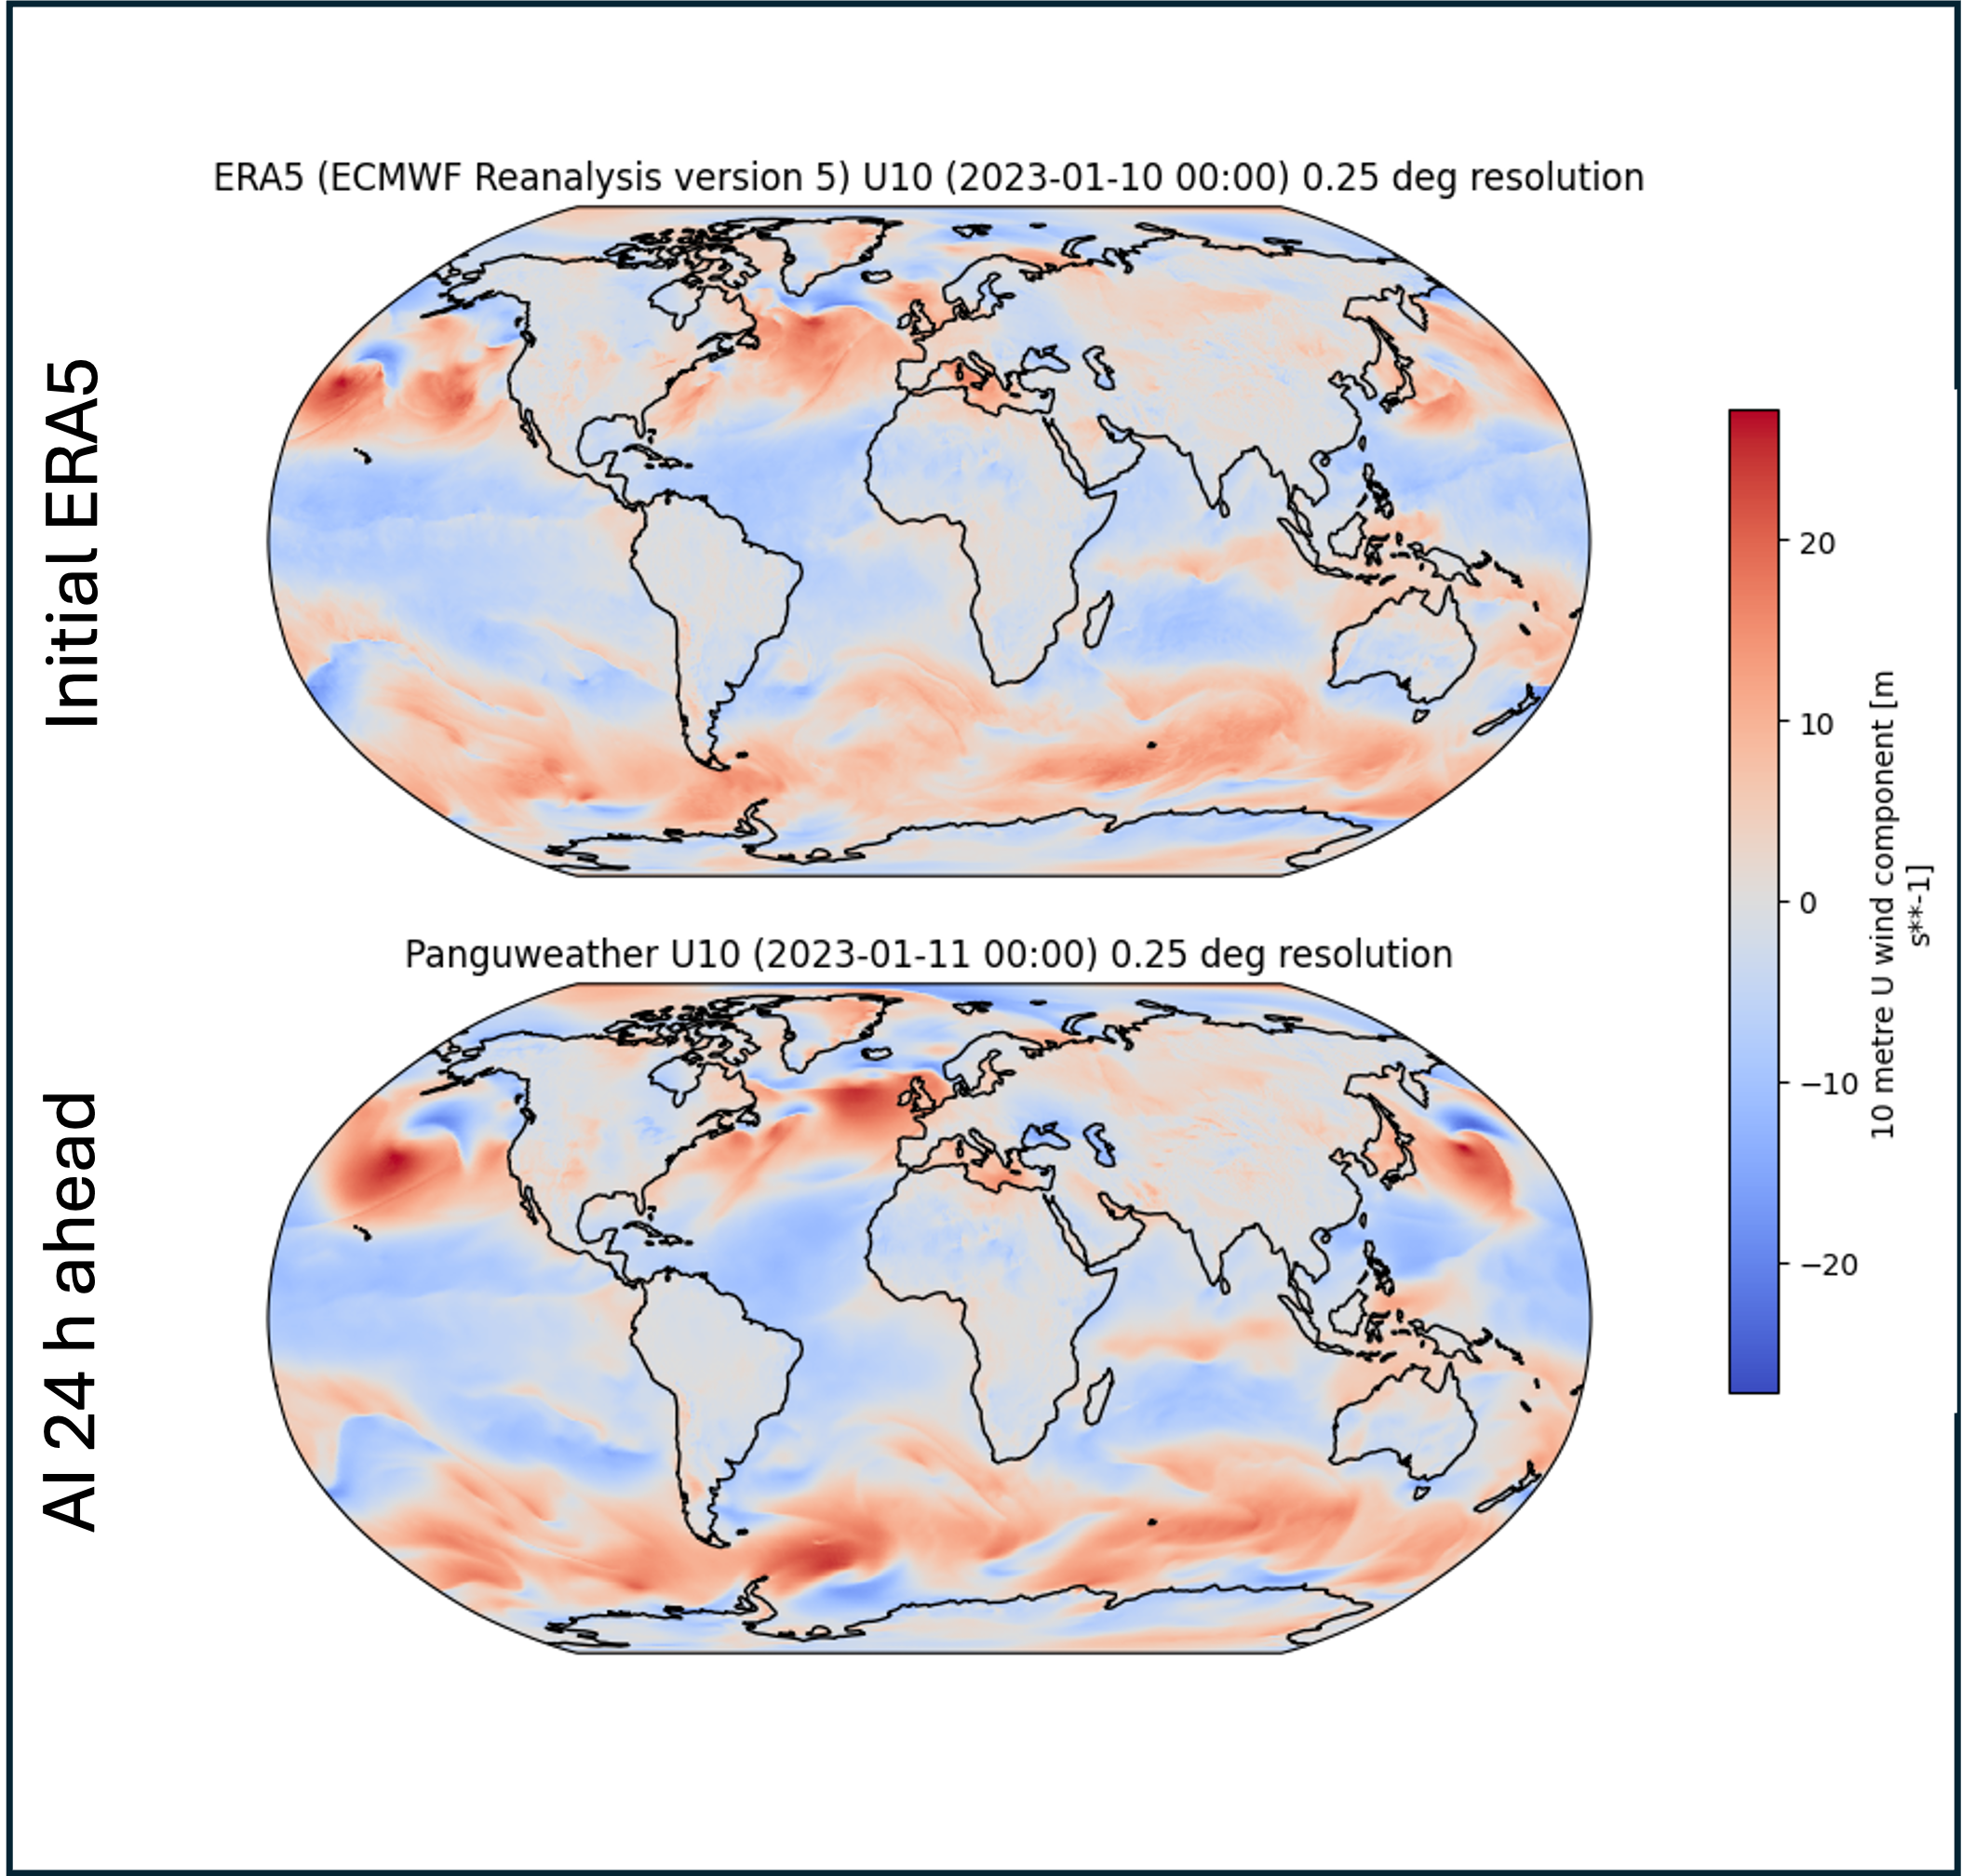

I'm sorry, I can't view images directly. If you can describe the image to me, I'd be happy to help analyze or provide information based on your description.


In [6]:
import os
import io
from PIL import Image
from autogen.agentchat.contrib.multimodal_conversable_agent import MultimodalConversableAgent

# Initialize the agent
system_prompt = "You are a helpful agent that analyzes images from the user. Describe well what you see."
image_agent = MultimodalConversableAgent(
    name="image_chatbot",
    system_message=system_prompt,
    max_consecutive_auto_reply=2,
    llm_config=filtered_cl[0],
    human_input_mode="NEVER",
)

# Load the local image
image_path = "AI_pangu_weather.png"
image = Image.open(image_path)

# Display the image (optional)
image.show()

# Convert image to bytes for sending
image_bytes = io.BytesIO()
image.save(image_bytes, format='PNG')
image_data = image_bytes.getvalue()

# Send the image to the agent
message = f"Describe this image: <img {image_path}>."
response = image_agent.generate_reply([{"role": "user", "content": message}])

# Print the response
print(response)

In [8]:
import base64
from PIL import Image
from autogen.agentchat.contrib.multimodal_conversable_agent import MultimodalConversableAgent

# Initialize the agent
system_prompt = "You are a helpful agent that analyzes images from the user. Describe well what you see."
image_agent = MultimodalConversableAgent(
    name="image_chatbot",
    system_message=system_prompt,
    max_consecutive_auto_reply=10,
    llm_config=filtered_cl[0],
    human_input_mode="NEVER",
)


Error: 'str' object has no attribute 'save'


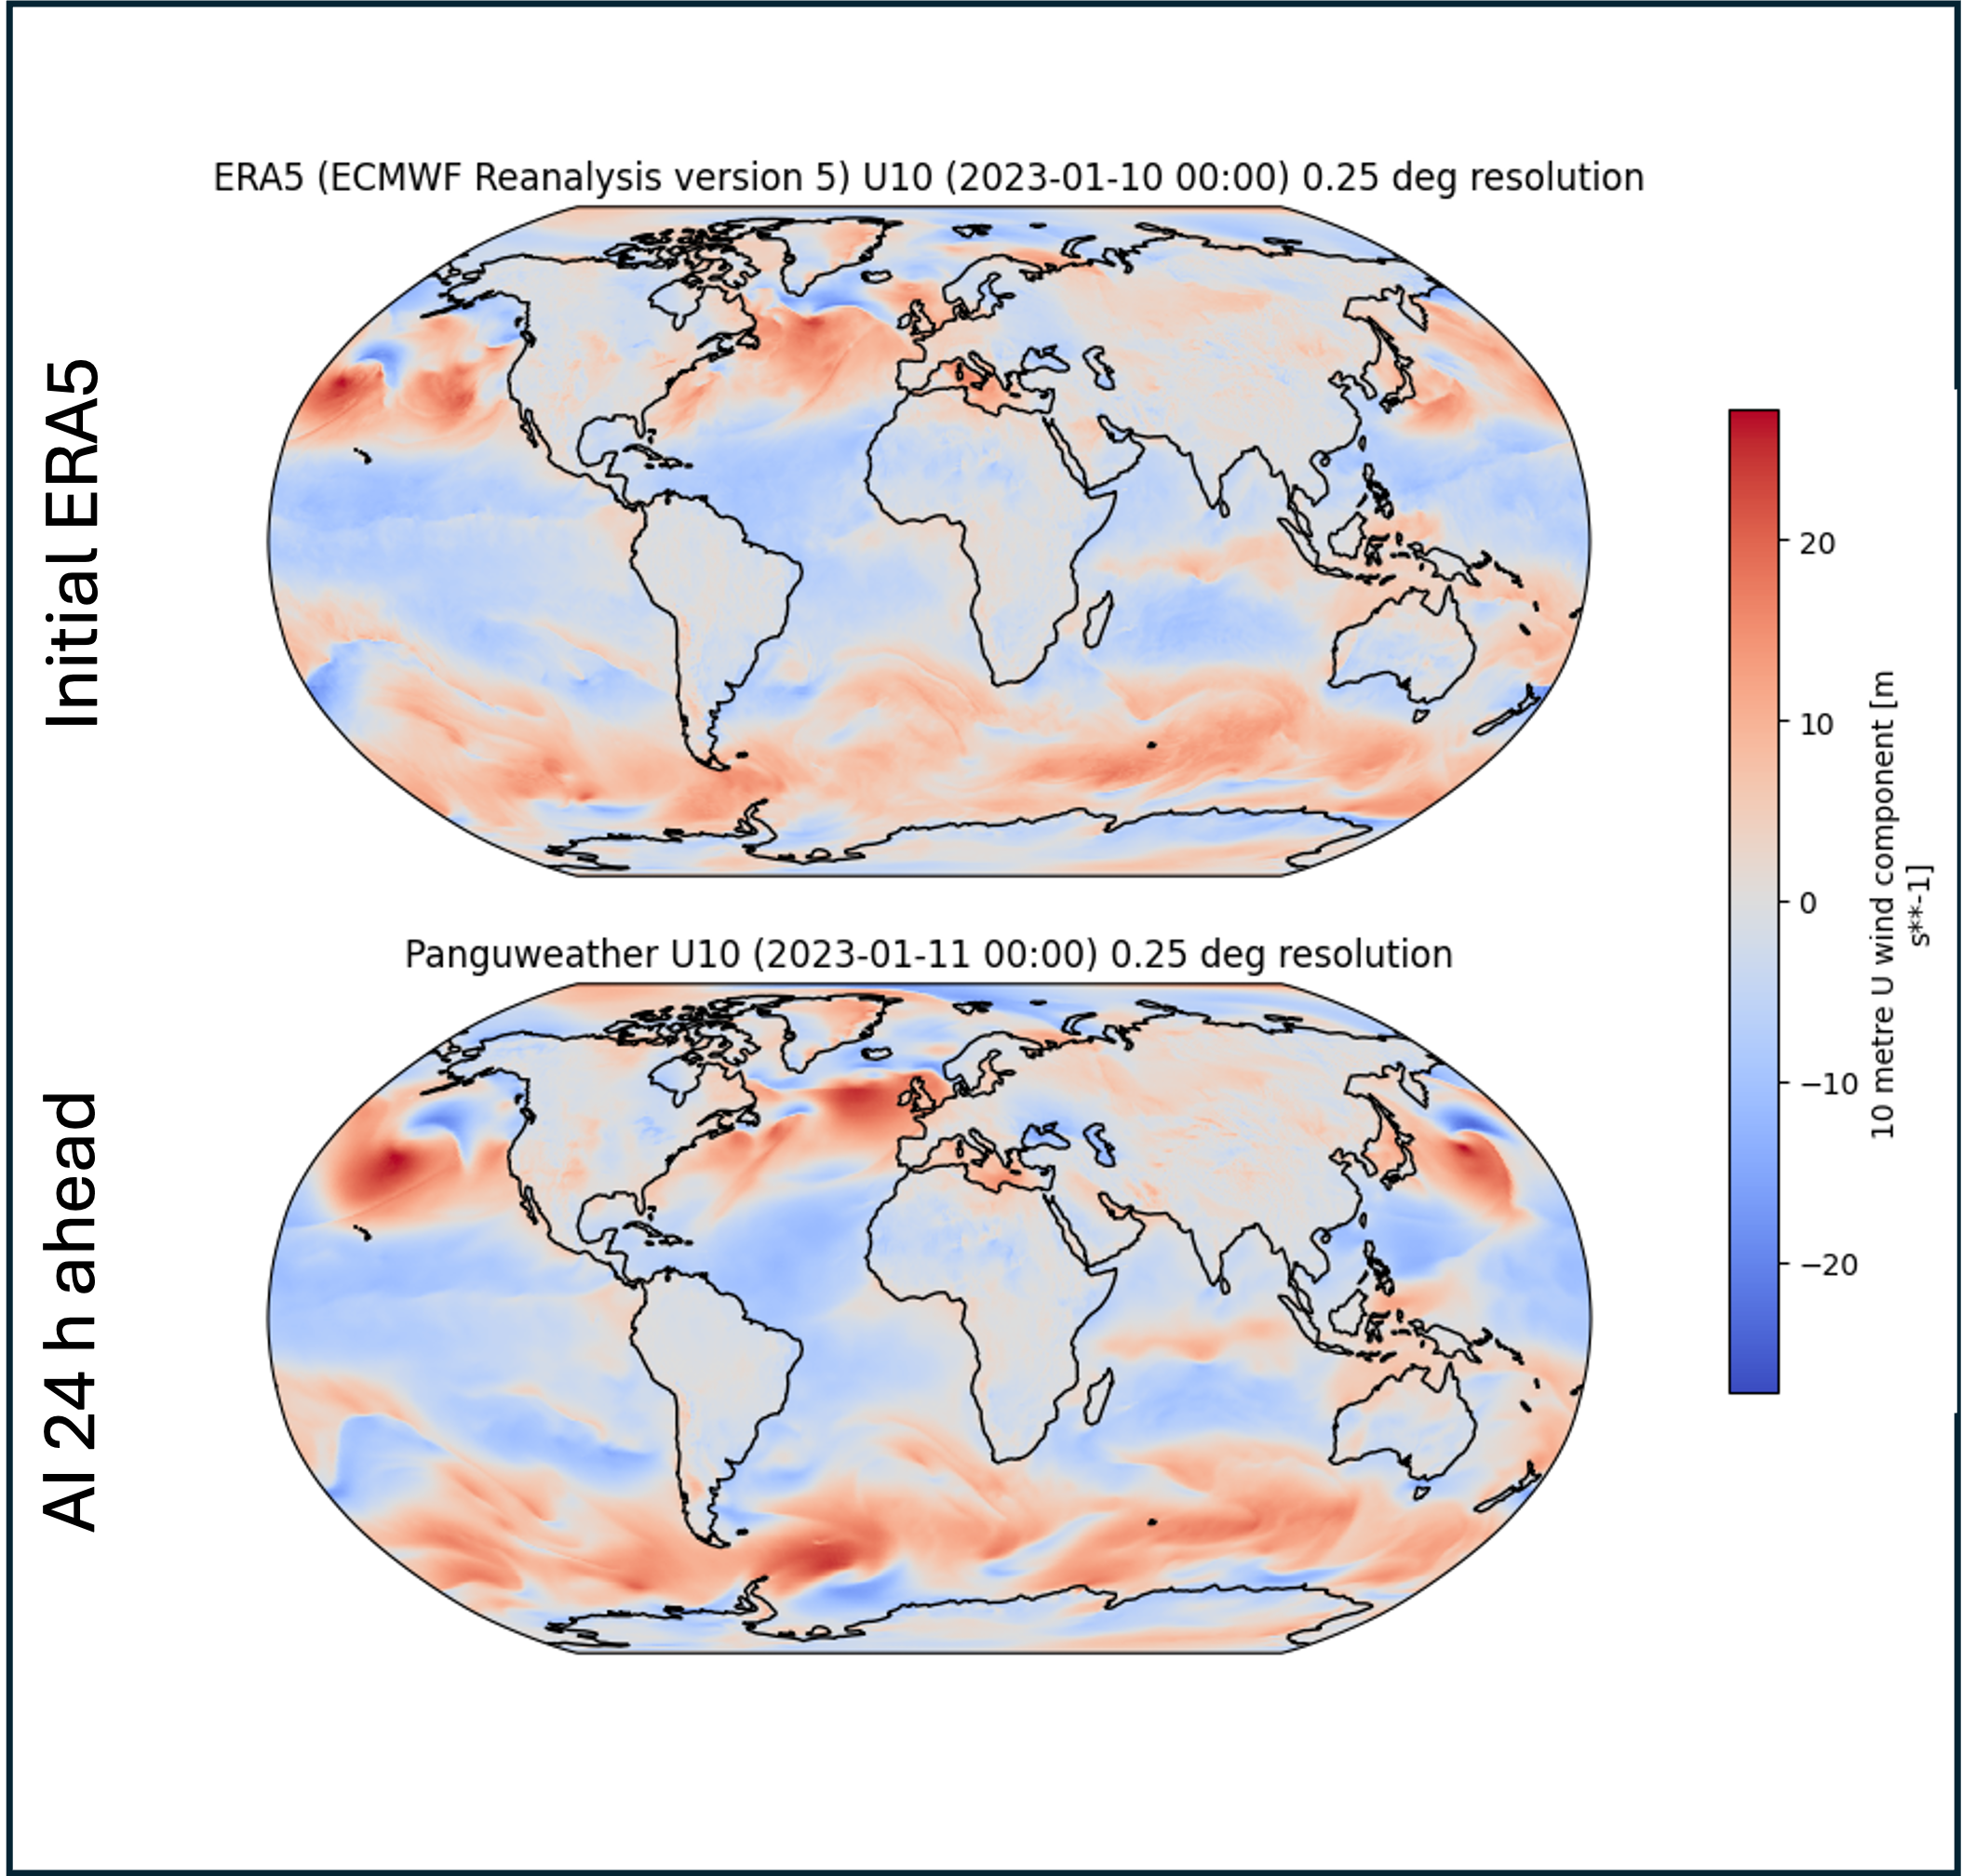

In [10]:
# display image just to check if loaded correctly
from IPython.display import Image, display
display(Image(data=base64.b64decode(base64image)))
